In [1]:
import tensorflow as tf
import warnings,os
import matplotlib.pyplot as plt
print(tf.__version__)
import pandas as pd

2.8.0


In [2]:
df = pd.read_csv('breast-cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df['diagnosis'] = df['diagnosis'].map({'B':0,'M':1}).astype(int)

In [5]:
corr_matrix = df.corr()

# Find highly correlated features
highly_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.87:
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            highly_corr_features.add(colname_i)
            highly_corr_features.add(colname_j)

# Remove highly correlated features
df = df.drop(highly_corr_features, axis=1)


In [6]:
df.shape

(569, 15)

In [7]:
df['concave_points'] = df['concave points_se']
df.drop(['concave points_se'],inplace=True,axis=1)
df.head()

,id,diagnosis,smoothness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,compactness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst,concave_points
0,842302,1,0.11840,0.2419,0.07871,0.9053,0.006399,0.04904,0.05373,0.03003,0.006193,0.1622,0.4601,0.11890,0.01587
1,842517,1,0.08474,0.1812,0.05667,0.7339,0.005225,0.01308,0.01860,0.01389,0.003532,0.1238,0.2750,0.08902,0.01340
2,84300903,1,0.10960,0.2069,0.05999,0.7869,0.006150,0.04006,0.03832,0.02250,0.004571,0.1444,0.3613,0.08758,0.02058
3,84348301,1,0.14250,0.2597,0.09744,1.1560,0.009110,0.07458,0.05661,0.05963,0.009208,0.2098,0.6638,0.17300,0.01867
4,84358402,1,0.10030,0.1809,0.05883,0.7813,0.011490,0.02461,0.05688,0.01756,0.005115,0.1374,0.2364,0.07678,0.01885


In [8]:
df.drop(['id'],axis=1,inplace=True)
X = df.drop(columns='diagnosis', axis=1)
Y = df['diagnosis']

In [9]:
df.corr()

,diagnosis,smoothness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,compactness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst,concave_points
diagnosis,1.000000,0.358560,0.330499,-0.012838,-0.008303,-0.067016,0.292999,0.253730,-0.006522,0.077972,0.421465,0.416294,0.323872,0.408042
smoothness_mean,0.358560,1.000000,0.557775,0.584792,0.068406,0.332375,0.318943,0.248396,0.200774,0.283607,0.805324,0.394309,0.499316,0.380676
symmetry_mean,0.330499,0.557775,1.000000,0.479921,0.128053,0.187321,0.421659,0.342627,0.449137,0.331786,0.426675,0.699826,0.438413,0.393298
fractal_dimension_mean,-0.012838,0.584792,0.479921,1.000000,0.164174,0.401964,0.559837,0.446630,0.345007,0.688132,0.504942,0.334019,0.767297,0.341198
texture_se,-0.008303,0.068406,0.128053,0.164174,1.000000,0.397243,0.231700,0.194998,0.411621,0.279723,-0.073658,-0.128215,-0.045655,0.230283
smoothness_se,-0.067016,0.332375,0.187321,0.401964,0.397243,1.000000,0.336696,0.268685,0.413506,0.427374,0.314457,-0.107342,0.101480,0.328429
compactness_se,0.292999,0.318943,0.421659,0.559837,0.231700,0.336696,1.000000,0.801268,0.394713,0.803269,0.227394,0.277878,0.590973,0.744083
concavity_se,0.253730,0.248396,0.342627,0.446630,0.194998,0.268685,0.801268,1.000000,0.309429,0.727372,0.168481,0.197788,0.439329,0.771804
symmetry_se,-0.006522,0.200774,0.449137,0.345007,0.411621,0.413506,0.394713,0.309429,1.000000,0.369078,-0.012662,0.389402,0.078079,0.312780
fractal_dimension_se,0.077972,0.283607,0.331786,0.688132,0.279723,0.427374,0.803269,0.727372,0.369078,1.000000,0.170568,0.111094,0.591328,0.611044


In [10]:
# Sequential ---

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,Softmax,ELU
from tensorflow.keras.layers import Dropout

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33, random_state = 0)

In [12]:
sc = StandardScaler()

In [13]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train.shape

(381, 13)

In [15]:
classifier = Sequential()

In [16]:
# adding the first input layer
classifier.add(Dense(units=14,activation='relu'))
# adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
# adding the second hidden layer
classifier.add(Dense(units=2,activation='relu'))
# adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [17]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
model = classifier.fit(X_train,y_train,validation_split=.33,batch_size=10,epochs=60)

Epoch 1/60
26/26 [==============================] - 2s 28ms/step - loss: 0.6788 - accuracy: 0.6314 - val_loss: 0.6851 - val_accuracy: 0.6825
Epoch 2/60
26/26 [==============================] - 0s 7ms/step - loss: 0.6605 - accuracy: 0.6902 - val_loss: 0.6656 - val_accuracy: 0.7063
Epoch 3/60
26/26 [==============================] - 0s 7ms/step - loss: 0.6407 - accuracy: 0.7333 - val_loss: 0.6488 - val_accuracy: 0.7619
Epoch 4/60
26/26 [==============================] - 0s 8ms/step - loss: 0.6264 - accuracy: 0.7569 - val_loss: 0.6343 - val_accuracy: 0.7857
Epoch 5/60
26/26 [==============================] - 0s 7ms/step - loss: 0.6108 - accuracy: 0.7725 - val_loss: 0.6152 - val_accuracy: 0.8016
Epoch 6/60
26/26 [==============================] - 0s 5ms/step - loss: 0.5977 - accuracy: 0.7686 - val_loss: 0.6003 - val_accuracy: 0.8095
Epoch 7/60
26/26 [==============================] - 0s 5ms/step - loss: 0.5843 - accuracy: 0.7882 - val_loss: 0.5902 - val_accuracy: 0.8175
Epoch 8/60
26/26 [=

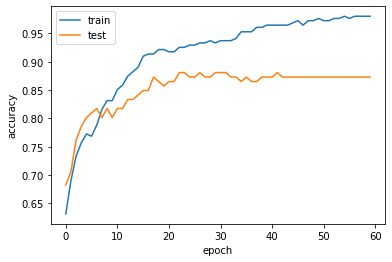

In [19]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

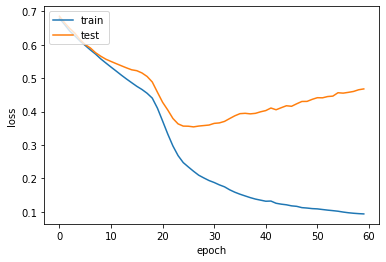

In [20]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [21]:
from tensorflow.keras.models import load_model

In [22]:
classifier.save("my_model.h5")